In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import set_config
set_config(display='diagram')

In [34]:
df = pd.read_csv('products.tsv', sep='\t', index_col='id')
df

,name,brand,discount_price,price,rating,num_reviews,quantity_sold
id,,,,,,,
76181490.0,Phần Mềm Diệt Virus BKAV Profressional 12 Thán...,Bkav,195000.0,299000.0,4.8,927.0,23907.0
416978.0,Bộ Chuyển Đổi USB Wifi Nano TP-Link TL-WN725N ...,TP-Link,117300.0,239000.0,4.5,611.0,6677.0
53056161.0,Phần mềm Microsoft 365 Family English APAC EM ...,Microsoft,1190000.0,1690000.0,5.0,720.0,3132.0
73795655.0,Apple Macbook Pro 2020 M1 - 13 Inchs (Apple M1...,Apple,30990000.0,34990000.0,5.0,209.0,460.0
23393172.0,Máy in HP Neverstop Laser 1000w (In/Wifi/Trắn...,HP,3100000.0,4290000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
97251112.0,Bột Cà Chua Trivie,Trivie,84000.0,84000.0,0.0,0.0,1.0
85095152.0,LỌC THÁC VIPSUN 303H - LỌC THÁC MINI CHO HỒ CÁ...,OEM,100000.0,104000.0,0.0,0.0,1.0
791327.0,Hỗn Hợp Ngũ Cốc Roasted Muesli Brookfarm (350g),BROOKFARM,236000.0,236000.0,3.5,6.0,244.0


## Khám phá dữ liệu

In [35]:
df.shape

(20021, 7)

In [36]:
df.isna().sum()

name              0
brand             1
discount_price    1
price             1
rating            1
num_reviews       1
quantity_sold     2
dtype: int64

Vì chỉ có 2 dòng có giá trị thiếu nên sẽ xoá luôn 2 dòng này 

In [37]:
df.duplicated().sum()

14

Có 14 dòng bị lặp

In [38]:
df[df.duplicated()]

,name,brand,discount_price,price,rating,num_reviews,quantity_sold
id,,,,,,,
109581548.0,Bộ Phát Wifi Mesh TP-Link Deco X60 AX3000 MU-M...,TP-Link,8390000.0,9999000.0,0.0,0.0,1.0
55963318.0,"Sạc cho laptop Dell Latitude 3540, 3480, Vostr...",OEM,255000.0,450000.0,0.0,0.0,0.0
73599551.0,Pin dành cho Laptop DELL Inspiron 14-7460. 7460,OEM,760000.0,1200000.0,0.0,0.0,0.0
15295300.0,[ Set 10 thẻ] Thẻ từ máy chấm công tần số 125K...,OEM,58000.0,200000.0,5.0,2.0,26.0
98388758.0,Combo mic thu âm Livestream H9 và Mic Bm 900 ...,OEM,736000.0,936000.0,0.0,0.0,0.0
100186669.0,"Giá đỡ làm mát máy tính sách tay, dụng cụ hỗ t...",OEM,15000.0,18000.0,0.0,0.0,0.0
47511272.0,Case máy tính NZXT H510 Elite (White) - Hàng c...,NZXT,4090000.0,4196000.0,0.0,0.0,2.0
52250532.0,2 XẤP THẺ GIẤY CHẤM CÔNG- BÌA CỨNG- HÀNG NHẬP ...,RONALD JACK,160000.0,240000.0,0.0,0.0,2.0
109686786.0,Ổ cứng Toshiba/S300/Surveillance dung lượng ch...,Toshiba,883000.0,1330000.0,4.0,1.0,1.0


In [12]:
df.index.duplicated().sum()

23

Có 23 ID bị lặp

In [13]:
df[df.index.duplicated()]

,name,brand,discount_price,price,rating,num_reviews,quantity_sold
id,,,,,,,
109581548.0,Bộ Phát Wifi Mesh TP-Link Deco X60 AX3000 MU-M...,TP-Link,8390000.0,9999000.0,0.0,0.0,1.0
55963318.0,"Sạc cho laptop Dell Latitude 3540, 3480, Vostr...",OEM,255000.0,450000.0,0.0,0.0,0.0
38384495.0,Nguồn 5V 2A Adapter Máy Chấm Công - Hàng Nhập ...,OEM,299000.0,680000.0,0.0,0.0,0.0
73599551.0,Pin dành cho Laptop DELL Inspiron 14-7460. 7460,OEM,760000.0,1200000.0,0.0,0.0,0.0
107058325.0,Máy chấm công quét vân tay Deli – màu đen - E3960,Deli,915000.0,1078000.0,0.0,0.0,4.0
15295300.0,[ Set 10 thẻ] Thẻ từ máy chấm công tần số 125K...,OEM,58000.0,200000.0,5.0,2.0,26.0
31547491.0,Khay Chuyển Ổ Cứng 2.5 Inch Sang 3.5 Inch Dùng...,OEM,25000.0,40000.0,4.0,1.0,7.0
98388758.0,Combo mic thu âm Livestream H9 và Mic Bm 900 ...,OEM,736000.0,936000.0,0.0,0.0,0.0
59237304.0,Bàn phím dành cho Laptop Toshiba Satellite C64...,OEM,265000.0,320000.0,4.5,2.0,2.0


Xoá các dòng có bị lặp, ID bị lặp, chứa null

In [39]:
data_df = df.drop_duplicates().dropna().reset_index()
data_df.drop_duplicates(subset='id', inplace=True)
data_df.set_index('id', inplace=True)
data_df.isna().sum()

name              0
brand             0
discount_price    0
price             0
rating            0
num_reviews       0
quantity_sold     0
dtype: int64

In [32]:
data_df[data_df.isna()]

,name,brand,discount_price,price,rating,num_reviews,quantity_sold
id,,,,,,,
76181490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53056161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73795655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23393172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
97251112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85095152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sau khi xử lý các dòng bị lặp và null thì dữ liệu còn lại 19993 dòng x 7 cột

In [15]:
data_df.dtypes

name               object
brand              object
discount_price    float64
price             float64
rating            float64
num_reviews       float64
quantity_sold     float64
dtype: object

Dữ liệu của *số lượng người bình luận* và *số lượng sản phẩm được bán* thì không thể là float64, nên chuyển cột `num_reviews` và `quantity_sold` sang int64

In [16]:
data_df = data_df.astype({'quantity_sold':'int64',
                          'num_reviews':'int64'})
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19993 entries, 76181490.0 to 8258702.0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            19993 non-null  object 
 1   brand           19993 non-null  object 
 2   discount_price  19993 non-null  float64
 3   price           19993 non-null  float64
 4   rating          19993 non-null  float64
 5   num_reviews     19993 non-null  int64  
 6   quantity_sold   19993 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ MB


Output của ta là `rating` và input là tất cả các thông tin của sản phẩm trừ `rating`.

In [40]:
X = data_df.drop(["rating"], axis=1)
y = data_df["rating"]

In [41]:
# Tỉ lệ các giá trị rating có được
data_df['rating'].value_counts(normalize=True) * 100

0.0    42.409843
5.0    21.727605
4.5     6.802381
4.8     5.972090
4.7     5.236833
4.0     3.816336
4.6     3.731306
4.3     2.285800
3.0     1.335467
1.0     1.100385
4.2     1.100385
4.1     0.675236
3.5     0.615215
3.8     0.565198
3.7     0.520182
3.3     0.400140
2.0     0.360126
3.9     0.320112
3.6     0.200070
2.5     0.185065
3.4     0.115040
3.2     0.110039
2.3     0.090032
2.8     0.080028
2.7     0.060021
4.4     0.045016
1.5     0.030011
3.1     0.030011
2.6     0.025009
1.7     0.015005
2.4     0.015005
4.9     0.010004
2.9     0.010004
1.8     0.005002
Name: rating, dtype: float64

Ta thấy tỉ lệ này không đồng đều, có 0 và 5 rating chiếm 60% dữ liệu, và có những rating chiếm tỉ lệ rất nhỏ là 0.005%

## Chia các tập dữ liệu

In [42]:
train_X, test_X, train_y, test_y = \
                              train_test_split(X, y, 
                                               test_size=0.3, 
                                               random_state=0)
val_X, test_X, val_y, test_y = \
                              train_test_split(test_X, test_y, 
                                               test_size=0.5, 
                                               random_state=0)

In [43]:
train_X.shape

(13995, 6)

In [44]:
train_y.shape

(13995,)

In [45]:
val_X.shape

(2999, 6)

In [46]:
val_y.shape

(2999,)

In [47]:
test_X.shape

(2999, 6)

In [48]:
test_y.shape

(2999,)

## Khám phá dữ liệu

### Tập train 

In [51]:
train_X.dtypes

name               object
brand              object
discount_price    float64
price             float64
num_reviews       float64
quantity_sold     float64
dtype: object

In [50]:
train_X.dtypes[train_X.dtypes != object]

discount_price    float64
price             float64
num_reviews       float64
quantity_sold     float64
dtype: object

Có 4 cột có dữ liệu dạng số và 2 cột có dữ liệu dạng object

Với các cột có dữ liệu dạng số

In [113]:
num_cols = ['discount_price','price','num_reviews','quantity_sold']
df = train_X[num_cols]
def missing_percentage(c):
    return (c.isna().mean() * 100).round(1)
def median(c):
    return c.quantile(0.5).round(1)
df.agg([missing_percentage, 'min', median, 'max'])

,discount_price,price,num_reviews,quantity_sold
missing_percentage,0.0,0.0,0.0,0.0
min,1000.0,1100.0,0.0,0.0
median,200000.0,280000.0,1.0,6.0
max,180000000.0,180000000.0,2048.0,38638.0


Với các cột object

In [132]:
pd.set_option('display.max_colwidth', 200)
object_cols = list(set(train_X.columns) - set(num_cols))
df = train_X[object_cols]
def num_values(df):
    return df.nunique()
def value_percentages(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_percentage, num_values, value_percentages])

,brand,name
missing_percentage,0.0,0.0
num_values,1979,13949
value_percentages,"{'OEM': 32.2, 'Tân Lộc Phát': 0.7, 'Mộc Sắc': 0.7, 'Samsung': 0.7, 'Cisco': 0.6, 'TP-Link': 0.6, 'Dell': 0.6, 'Ottogi': 0.6, 'Brother': 0.6, 'Dược Liệu Tuệ Tâm': 0.6, 'Royal Canin': 0.6, 'Xprinter...","{'Kẹo Hồng Sâm Không Đường 365 (500g)': 0.0, 'Sạc dành cho Laptop Asus Vivobook X201E, X202E Adapter 19.5V-2.37A': 0.0, 'Router DrayTek Vigor2927 - Hàng chính hãng': 0.0, 'Ngũ Cốc Yến Mạch Nguyên ..."


## Mã hóa cột brand để phục vụ cho viêc trực quan hóa dữ liệu
Sử dụng `LabelEncoder()`


    










In [197]:
from sklearn import preprocessing
l_enc = preprocessing.LabelEncoder()
l_enc.fit(data_df["brand"].values)
enc = l_enc.transform(data_df["brand"])
enc

array([ 258, 1892, 1251, ...,  200, 1022, 1431])

## Phát hiện sự mất cân bằng dữ liệu trong cột brand
### Có vẻ như số lượng sản phẩm của brand cao nhất có chênh lệch rất lớn so với số lượng sản phẩm của brand còn lại. (6448)
### Thậm chí các brand thấp nhất chỉ có duy nhất 1 sản phẩm 
### ==> Đây là dữ liệu mất cân bằng nghiêm trọng

In [198]:
data_df["brand"].value_counts()


OEM             6448
Mộc Sắc          137
Cisco            135
Samsung          133
Tân Lộc Phát     132
                ... 
YANBAN             1
Thuần Chay         1
Japonica           1
QUAKER OATS        1
Golden             1
Name: brand, Length: 2301, dtype: int64

## Dữ liệu sau khi được mã hóa


In [199]:

pd.Series(enc).value_counts()

1431    6448
1309     137
385      135
1725     133
2019     132
        ... 
1111       1
1079       1
1063       1
1015       1
2047       1
Length: 2301, dtype: int64


## Sử dụng lmplot

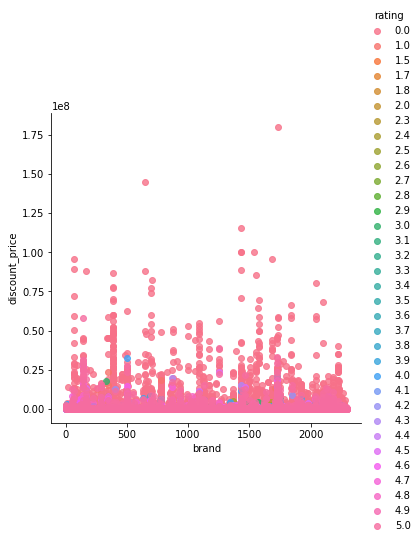

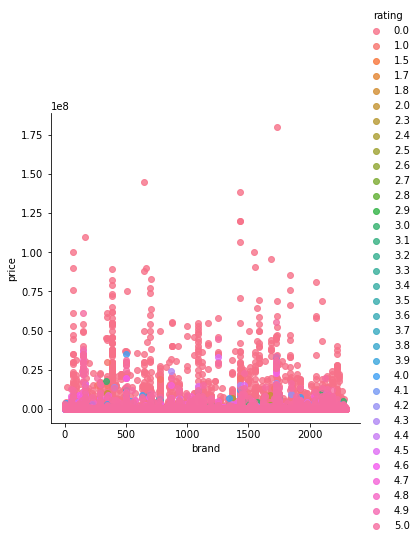

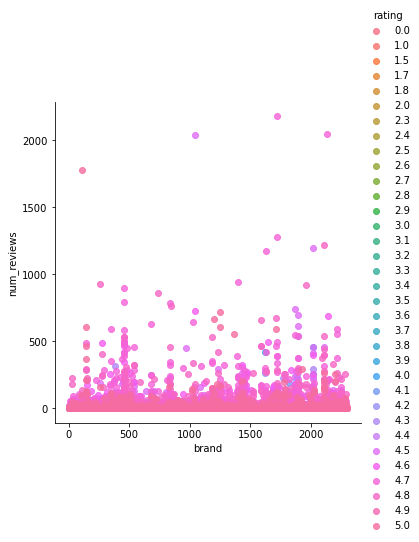

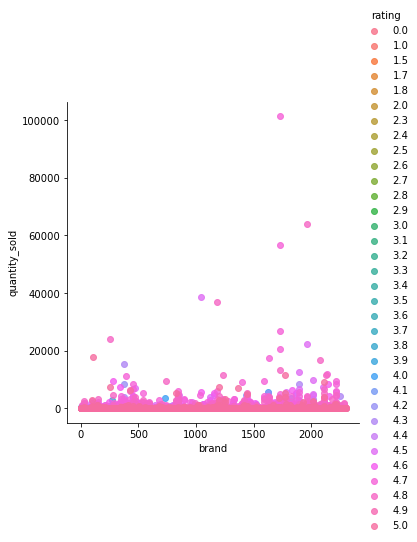

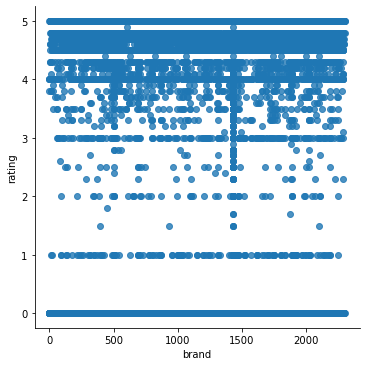

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns


bar = pd.concat([pd.Series(enc), data_df[num_cols].reset_index(drop = True), data_df["rating"].reset_index(drop = True)], ignore_index = True, axis = 1)
bar.columns = ["brand"] + num_cols + ["rating"]
sns.color_palette("rocket_r", as_cmap=True)
for i in range(len(num_cols)):
    sns.lmplot(x = "brand", y = num_cols[i], data = bar, hue = "rating", fit_reg=False)


sns.lmplot(x = "brand", y = "rating", data = bar, fit_reg=False)

## Sử dụng scatter_matrix

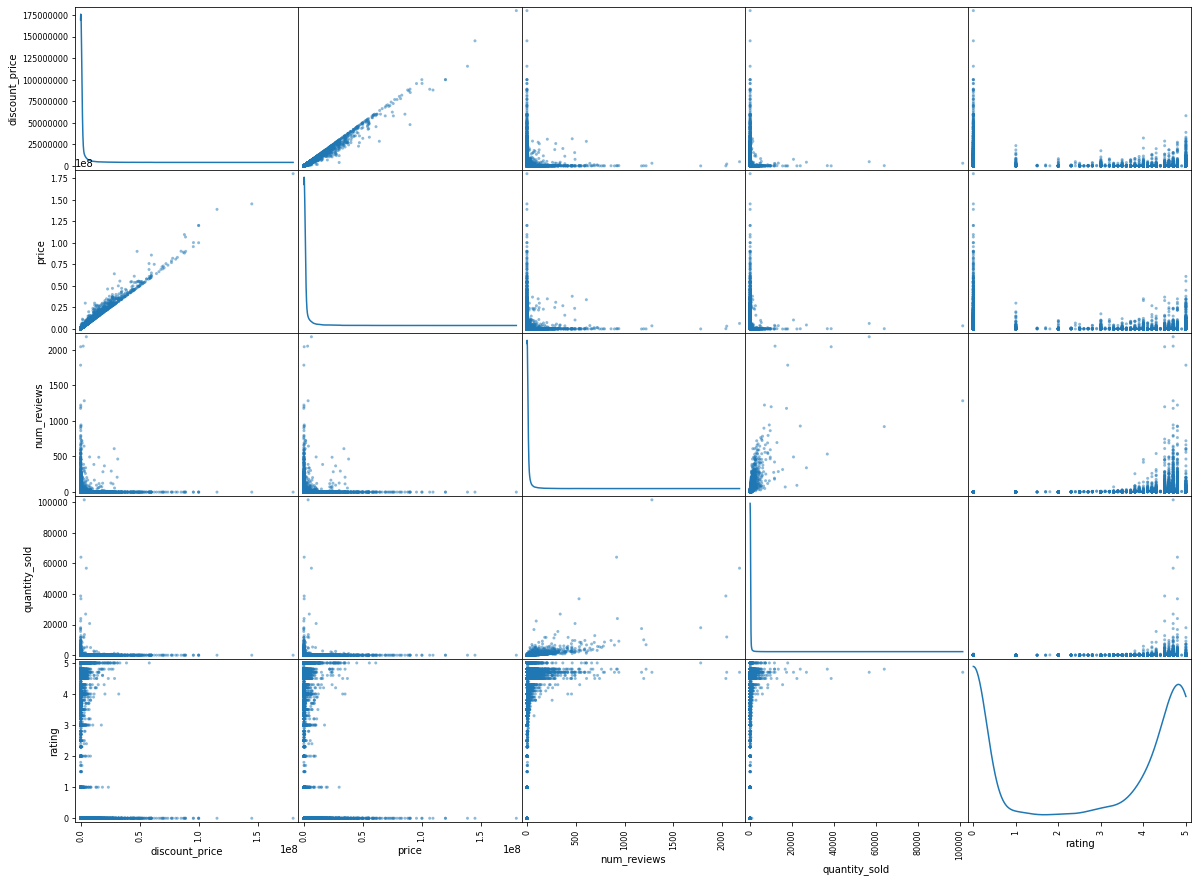

In [201]:
pd.plotting.scatter_matrix(data_df[["brand"] + num_cols + ["rating"]],
diagonal="kde", figsize=(20, 15))
plt.show()

## Kết luận
### Có thể kết luận rằng cột brand độc lập với tất cả các cột trong tập dữ liệu và vì tính mất cân bằng của nó nên 
### quyết định cuối cùng là loại bỏ nó ra khỏi tập dữ liệu!!!

## Tiền xử lý tập train 

In [53]:
class ColDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(['name', 'brand'], axis=1)

In [54]:
colDropper = ColDropper()
colDropper.fit_transform(train_X)

,discount_price,price,num_reviews,quantity_sold
id,,,,
36490442.0,10750000.0,12500000.0,0.0,0.0
48579507.0,69000.0,80000.0,180.0,1672.0
5866217.0,33000.0,45000.0,0.0,97.0
16217273.0,59000.0,280000.0,8.0,24.0
46581257.0,21400.0,99000.0,8.0,103.0
...,...,...,...,...
104241000.0,19999.0,50000.0,0.0,4.0
36667085.0,95000.0,129000.0,18.0,138.0
28624284.0,3749000.0,4890000.0,3.0,33.0


In [55]:
#preprocess_pipeline = make_pipeline(ColDropper(),
                                   #make_column_transformer((OneHotEncoder(handle_unknown="ignore"),['brand'])),
                                   #StandardScaler(with_mean=False))
preprocess_pipeline = make_pipeline(ColDropper(),
                                   StandardScaler(with_mean=False))
preprocess_pipeline

Pipeline(steps=[('coldropper', ColDropper()),
                ('standardscaler', StandardScaler(with_mean=False))])

In [56]:
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X)

In [57]:
preprocessed_val_X = preprocess_pipeline.transform(val_X)

## Mô hình hoá

In [83]:
#full_pipeline = make_pipeline(ColDropper(),
                              #make_column_transformer((OneHotEncoder(handle_unknown="ignore"),['brand'])),
                              #StandardScaler(with_mean=False), 
                              #MLPRegressor(
                                           #random_state=1,
                                         #activation='logistic',
                                         #solver='lbfgs',
                                         #hidden_layer_sizes=(200,),
                                         #max_iter=2500))
full_pipeline = make_pipeline(ColDropper(),
                              StandardScaler(with_mean=False), 
                              MLPRegressor(
                                           random_state=0,
                                         activation='logistic',
                                         solver='lbfgs',
                                         hidden_layer_sizes=(200,),
                                         max_iter=25000))
full_pipeline

Pipeline(steps=[('coldropper', ColDropper()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', hidden_layer_sizes=(200,),
                              max_iter=25000, random_state=0,
                              solver='lbfgs'))])

In [84]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score as R2

In [85]:
def scoreModel(y_true, y_pre):
    MAE_score = MAE(y_true, y_pre)
    r2_score = R2(y_true, y_pre)
    print('MAE: ', MAE_score)  
    print('R2 score: ', r2_score)
    return MAE_score, r2_score

In [86]:
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]

best_err = float('inf')
best_alpha = None

for alpha in alphas:    
    pipe = full_pipeline.set_params(mlpregressor__alpha=alpha)
    pipe.fit(train_X, train_y)
        
    train_pred = pipe.predict(train_X)  
    test_pred = pipe.predict(val_X)
        
    train_score = MAE(train_y, train_pred)
    print(f'alpha = {alpha}')
    print('train:')
    print('MAE: ', train_score)
    
    val_score = MAE(val_y, test_pred)
    print('val:')
    print('MAE: ', val_score)
    val_errs.append(val_score) 
    
    if val_score == min(val_errs):
        best_err = val_score
        best_alpha = alpha      

        'Finish!'

alpha = 0.1
train:
MAE:  0.2983834313745738
val:
MAE:  0.2957655609358386
alpha = 1
train:
MAE:  0.39497565893350534
val:
MAE:  0.39375997828379555
alpha = 10
train:
MAE:  0.8028950878987703
val:
MAE:  0.8023563722359568
alpha = 100
train:
MAE:  1.510531275001506
val:
MAE:  1.527615878478066
alpha = 1000
train:
MAE:  2.090184964774948
val:
MAE:  2.1081632844460003


In [87]:
print(f'Best alpha: {best_alpha}, best val error: {best_err}') 

Best alpha: 0.1, best val error: 0.2957655609358386


In [88]:
full_pipeline.set_params(mlpregressor__alpha=best_alpha)
full_pipeline.fit(pd.concat([train_X,val_X]), pd.concat([train_y,val_y]))

Pipeline(steps=[('coldropper', ColDropper()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.1,
                              hidden_layer_sizes=(200,), max_iter=25000,
                              random_state=0, solver='lbfgs'))])

In [89]:
preds_test = full_pipeline.predict(test_X)
pd.DataFrame({
            'predict': preds_test,
            'rating': test_y})

,predict,rating
id,,
1716053.0,4.575897,4.7
75698282.0,4.300464,5.0
36776673.0,0.003900,0.0
37417334.0,4.610148,4.7
15236471.0,0.073998,0.0
...,...,...
81759492.0,4.284563,3.0
92533540.0,-0.011226,0.0
52134199.0,4.322526,4.7


## Sau khi loại bỏ cột brand thì điểm số của mô hình được cải thiện vô cùng đáng kể 

In [90]:
scoreModel(test_y,preds_test)

MAE:  0.2861946015327883
R2 score:  0.9461319967526868


(0.2861946015327883, 0.9461319967526868)

In [91]:
full_pipeline.score(test_X, test_y)

0.9461319967526868